# Project - Programming for Data Analysis

Create a Data Set by Simulating a read-world phenomenon of your choosing.

***

This project includes the following:

> Choose a real world phenomenon (four variables - minimum 100 data points)

> Investigate variable type, distributions and they relationships with each other

> Synthesise Dataset

> Detail your research - output simulated dataset


***

***


<br>

## Potential Dataset Review

<br>


****


I was personally interested in looking for a dataset related to people, or the measurement of a human activity. There are numberous locations for datasets online  - varying from college websites, Government websites and international organisations.

I decided to review Irish Data and therefore decided to review datasets on the CSO website. I felt I would have a clearer background knowledge of the data and it would be of personal interest.

The following are examples of potential datasets that I reviewed for use and an overview of these datasets:


In [ ]:
import numpy as np
import pandas as pd

# using Pandas we will view the datasets - importing and reading the CSV files from various locations

***

### Employment and Disability

The following is a dataset of information on the number of people in a given year working in Ireland with a disability, and then from this the different types of disability.


> https://data.cso.ie/#

For this dataset you need to go to the CAO site and search the dataset number - APD05

> https://data.cso.ie/table/APD05

[1]

In [ ]:
df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/APD05/CSV/1.0/")

# [2][3]

In [ ]:
df

In [ ]:
df.head()  # look at the top 5 rows

# [4][5]

While the information on this dataset is illuminating I wanted to look for another dataset with more numbers as opposed to so many text fields.

The CSO provides the included information on the break down of disability in Ireland under various headings. 

> https://www.cso.ie/en/releasesandpublications/ep/p-cp9hdc/p8hdc/

> https://www.cso.ie/en/releasesandpublications/ep/p-cp9hdc/p8hdc/p9d/

> https://www.cso.ie/en/releasesandpublications/ep/p-cp9hdc/p8hdc/p9chs/


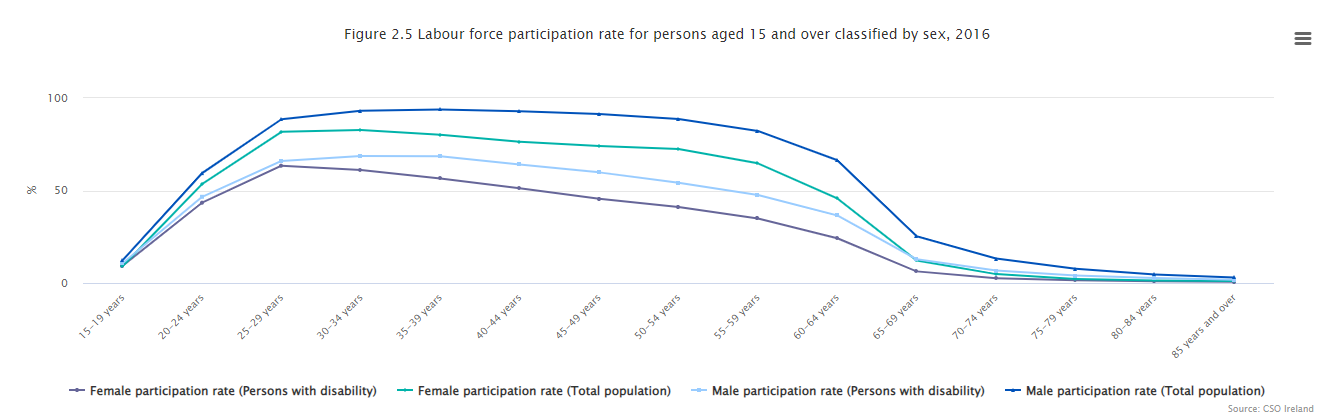

                                                                                                                     [6]

***

### Crime and Justice

The following is a datasetof Crime rates from 2003 - 2021. They are divided under crime type and also Garda Station.


> https://www.cso.ie/en/statistics/crimeandjustice/

> https://data.cso.ie/table/CJQ05


note: this data is still under review.

[1][2]

In [ ]:
df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/CJQ05/CSV/1.0/en")   # read csv

In [ ]:
df

In [ ]:
df.head()          # look at the top 5 rows

In [ ]:
df.describe()        # describe the dataframe

In [ ]:
df['Quarter'].str.split('Q',expand=True,)    # split the data out in the Quarter column [3][4][5]

In [ ]:
df[['Year', 'Quarter']] = df['Quarter'].str.split('Q',expand=True,)   # add the split data to the data frame [6]

In [ ]:
df

In [ ]:
df['VALUE'].value_counts()                     # Value Column - value counts of each value in this column

In [ ]:
df.groupby(by=['Year'])['VALUE'].mean()       # group by Year & Value - mean of this group

In [ ]:
df.groupby(by=['Year'])['VALUE'].count()     # group by Year & Value - count of inputs ( offences)

In [ ]:
df.groupby(by=['Year'])['VALUE'].sum()      # group by Year & Value - sums of total offences

In [ ]:
df.groupby(by=['Year'])['VALUE'].max()     # group by Year & Value - max offences for each year

In [ ]:
df.groupby(by=['Year', 'Type of Offence'])['VALUE'].max()      # year and type of offence

In [ ]:
df['TLIST(Q1)'][df['VALUE']].sum()                            # total number of offences

# [7]

In [ ]:
df.groupby(['Year', 'Type of Offence'])['VALUE'].count()             # number of reported offences by year - type of offence

In [ ]:
df.groupby(['Year', 'Type of Offence','Garda Region'])['VALUE'].sum()  # sum of each offence by location

In [ ]:
grouped = df.groupby('Garda Region').agg({'VALUE': [max]})            # group by max offences - total by region

grouped

In [ ]:
grouped = df.groupby('Type of Offence').agg({'VALUE': [min, max]})   # min and max number of offences - by type of offence

grouped

# [8]

In [ ]:
# offences by year

choice_year = ['2020']                          # choose year

rslt_df = df[df['Year'].isin(choice_year)]      # group by year and choice of year

rslt_df                                         # print output

#[9]

The CSO provides the following information on the breakdown of crimes in Ireland:

> https://www.cso.ie/en/releasesandpublications/ep/p-rc/recordedcrimeq32021/

> https://www.cso.ie/en/releasesandpublications/ep/p-rc/recordedcrimeq22021/

[10]

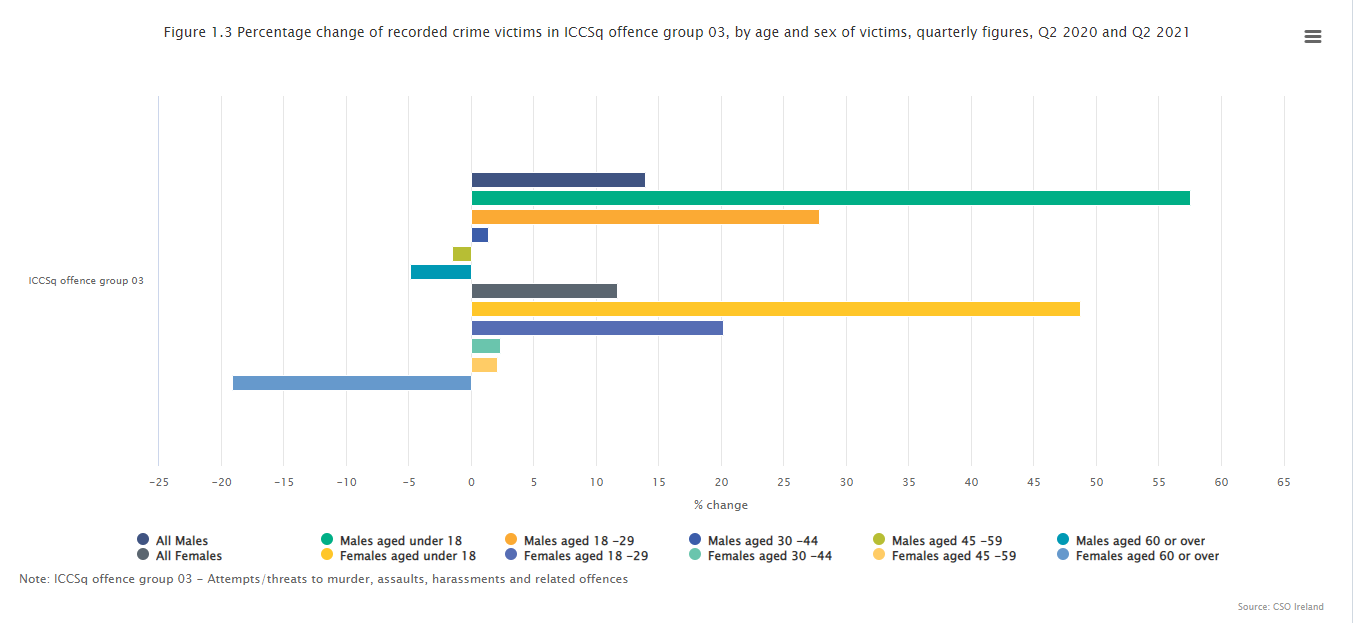

<br>

***

### Births

This dataset includes the number of births between 1980 - 2019. There is information on the year, month, rank (month that year with most births)


> https://data.cso.ie/table/VSA19


[1]

In [ ]:
df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/VSA19/CSV/1.0/en")


In [ ]:
df

In [ ]:
df.info()

#[2]

<br>

In this dataset we have the following values:

Births or Rank - 
 - Births being the total number of births for that date / Month / Year
 - Rank - where the total number of births for a date - and place in a total list for the year
 
Sex of Child - 
 - Male
 - Female
 - Both Sexes
 
Value - 
 - number of births
 
Date -
 - Broken into Year / Month / Date

<br>
Within these columns there is totals - for example the total number of both sexes born on a particular date

***

Here we will clean the data to create a working dataframe

***

In [ ]:
births = df[['Statistic', 'Year','Sex of Child', 'C01886V02319', 'Date of Occurrence','Month of Occurrence', 'VALUE']]

In [ ]:
births

#[3]

In [ ]:
# reorder these columns

births = df[['Statistic', 'C01886V02319', 'Date of Occurrence', 'Month of Occurrence', 'Year', 'Sex of Child','VALUE' ]]

In [ ]:
births

In [ ]:
# births.columns = ['Statistic', 'Year','Sex', 'Rank', 'Day of Occurrence', 'Month of Occurrence', 'Births']

births.columns = ['Statistic', 'Rank','Date', 'Month', 'Year', 'Sex', 'Births']

In [ ]:
births

#[4]

From this point you can analyise the data - concatenating the data for the dates and creating an overall variable - you can also compare years and their birth rates.

I do not think this dataset has the required 4 distinct variables so I have not choosen this for review.

****


****

<br>

## Selected Dataset - VSA36

<br>


****

After reviewing datasets, including the datasets listed and overviews given above, I have decided to review the following:

> https://data.cso.ie/table/VSA36

<br>

Please note that I have included copies of the dataset excel in the repository data file. 

However I have amended the headings and saved a file [here](Data/Births_VSA36.USE.csv), which I will use for analysis

<br>

This is a dataset that includes:

Births  

      - Total
      - Amount outside of marriage
    
Year  

      - 2008 - 2020

Age of Mother 

      - < 15
      - > 45
      - totals

Previous Children

      - 0-10
      - not stated
      
Value 

      - Number of Other Children

In [ ]:
df = pd.read_csv('Data/Births_VSA36.USE.csv')   # read in the file

In [ ]:
df                                              # print dataframe

In [ ]:
df.info()                                      # dataframe info

***

## Investigating the Dataset

> https://data.cso.ie/table/VSA36



[1]

***

In [ ]:
# import libraries

import numpy as np                            # Mathimatical Python
import matplotlib.pyplot as plt               # Plotting Library
import seaborn as sns                         # Plotting library which works on top of Matplotlib

#[2][3][4]

In [ ]:
df.info()                                     # dataframe info

In [ ]:
df['VALUE'] = df['VALUE'].fillna(0)           # for the value column replace NAN with 0

# [5]

In [ ]:
# Change data types

df['Age_Code'] = pd.to_numeric(df['Age_Code'], errors='coerce')   # change Age_Code - to a numeric output

# [6]

***

Total Births

For this analysis we will review only the total births by year


In [ ]:
df.iloc[6590]                                    # this is the last data point under Total Births

In [ ]:
df.loc[0:6590, :]                                # df cut down to only total births

# [7]

In [ ]:
df = df.loc[0:6590, :]                          # We now have a dataframe of total births only #[2]

In [ ]:
df                                              # print df

In [ ]:
df.info()                                       # df info

# here we are looking the Dtype

In [ ]:
# complete a histogram of the birth numbers of 20 year olds across all years

total_birth_20 = df[(df.Age_Code==20) & (df.Previous_Liveborn_Children=="Total Per Age Group")] # filter df

total_birth_20 = total_birth_20 [["Year","VALUE"]]                                              # set df - columns

total_birth_20                                                                                  # print df

# [8][9][10][11]

In [ ]:
sns.histplot(data=total_birth_20, x='Year')               # plot histogram - x = Year

# [11][12][13]

Looking that the above histogram we can see that there seemed to be a large number of babies born to mothers aged 20 in 2008 - again in 2014 and again in 2020.

This is a very low level look and we would need to take a larger slice of data to show more information on this dataset.

In [ ]:
# create groups to plot

Year_08 = df[(df.Year == 2008) & (df['Age_Code'] > 290) & (df['Age_Code'] < 999)]   # Filter for 2008 - age code over than 290

#[14]

In [ ]:
Year_08                                                  # print df

In [ ]:
filter_list = ['Total Per Age Group']    # set filter variable


Year_08 = Year_08[Year_08.Previous_Liveborn_Children.isin(filter_list)]  # filter the data and set it as Year_08

Year_08                                  # print variable

In [ ]:
# plot 2008 data

plt.figure(figsize = (15,8))                                     # set plot size

ax = sns.lineplot(data=Year_08, x="Age_of_Mother", y="VALUE")    # set lineplot, data and points

plt.xticks(rotation=45)                                          # set the x tick labels at a rotation

# [15][16]

In [ ]:
Year_All = df[(df.Year >= 2008) & (df['Age_Code'] > 290) & (df['Age_Code'] < 999)]  # set data for all years


filter_list = ['Total Per Age Group']                                               # filter this data to total per age group
Year_All = Year_All[Year_All.Previous_Liveborn_Children.isin(filter_list)]          # set filtered variable
Year_All                                                                            # print variable

In [ ]:
Year_All_1 = Year_All[["Year", "Age_of_Mother", "VALUE"]]  # take subset of the variable

In [ ]:
Year_All_1                                                 # print subset

In [ ]:
plt.figure(figsize = (15,8))                                        # plot size set

ax = sns.lineplot(data=Year_All_1, x="Age_of_Mother", y="VALUE")    # lineplot - Age of mother by number of children

plt.xticks(rotation=45)                                             # rotate x ticks 

In [ ]:
plt.figure(figsize = (15,8))                                                     # plot size set 

ax = sns.lineplot(data=Year_All_1, x="Age_of_Mother", y="VALUE", hue="Year")     # lineplot - Age of mother by number of children

plt.xticks(rotation=45)                                                          # rotate x ticks 

# in this graph we have added a hue by year which breaks out the line graph - showing each year
# this is dfferent from the above as it breaks out the hue


# [17]

****

From the above graph we can see that over all the years, in all demographic groups, the age at which woman had the most children was 30 - 34.

We can also see that the number of children born to women before the this age segment has also decreased steadly from 2008 - 2020.


Further the number of children born has also decreased but we would need further investigation to expand on this point.


****


<br>

In the following graphs we can plot the same information but this time for the births outside of Marriage - therefore comparing total births against the births outside of marriage. 


The space between these lines would show the number of children born in marriage.

We can also see from this graph if one age demographic is more likely to have children outside of marriage.

***

In [ ]:
df_M = pd.read_csv('Data/Births_VSA36.USE.csv') 

In [ ]:
df_M['VALUE'] = df_M['VALUE'].fillna(0) 
df_M['Age_Code'] = pd.to_numeric(df_M['Age_Code'], errors='coerce')

In [ ]:
df_M

In [ ]:
df_M = df_M.loc[6591:]

In [ ]:
df_M

In [ ]:
Married_All = df_M[(df_M.Year >= 2008) & (df_M['Age_Code'] > 290) & (df_M['Age_Code'] < 999)]


filter_list = ['Total Per Age Group']
Married_All = Married_All[Married_All.Previous_Liveborn_Children.isin(filter_list)]
Married_All

In [ ]:
Married_All = Married_All[["Year", "Age_of_Mother", "VALUE"]]
Married_All

In [ ]:
plt.figure(figsize = (15,8))                                                     # plot size set 

ax = sns.lineplot(data=Married_All, x="Age_of_Mother", y="VALUE", hue="Year")    # lineplot - Age of mother by number of children

plt.xticks(rotation=45)                                                          # rotate x ticks 

# plot births outside of marriage

In the following graphs I have plotted the two sets of data on one chart - here we can compare the total births to those outside of marriage.

In [ ]:
plt.figure(figsize = (15,8))                                        # plot size set

ax = sns.lineplot(data=Year_All_1, x="Age_of_Mother", y="VALUE")    # lineplot - Age of mother by number of children
ax1 = sns.lineplot(data=Married_All, x="Age_of_Mother", y="VALUE") 

plt.xticks(rotation=45)                                             # rotate x ticks 
plt.legend(labels=["Total Births","Births Outside Marriage"], title = "Title_Legend")

# [18][19][20]

In [ ]:
# add in year hue

plt.figure(figsize = (15,8))                                        # plot size set

ax = sns.lineplot(data=Year_All_1, x="Age_of_Mother", y="VALUE", hue="Year")    # lineplot - Age of mother by number of children
ax1 = sns.lineplot(data=Married_All, x="Age_of_Mother", y="VALUE", hue="Year") 

plt.xticks(rotation=45)                                             # rotate x ticks 
#plt.legend(labels=["Total Births","Births Outside Marriage"], title = "Title_Legend")
plt.legend()

***

In [ ]:
# Now we will plot the total births by year to see if this data has remained consistant or changed

df_years = pd.read_csv('Data/Births_VSA36.USE.csv')

In [ ]:
df_years['Age_Code'] = pd.to_numeric(df_years['Age_Code'], errors='coerce')
df_years['VALUE'] = df_years['VALUE'].fillna(0)  

In [ ]:
df_years = df_years[(df_years.Age_of_Mother=='All ages') & (df_years.PLC_Code==26)]

In [ ]:
df_years

We now have the total births across all ages for each year - note that there is no data for Births outside marriage for 2020.

In [ ]:
df_years_births = df_years.loc[0:6590]          # df with total births    

In [ ]:
df_years_nmar = df_years.loc[6591:13183]        # df with births outside of marriage only   

In [ ]:
df_years_births 

In [ ]:
df_years_nmar

In [ ]:
sns.barplot(x = 'Year',
            y = 'VALUE',
            data = df_years_births)
 
# Show the plot
plt.show()

In [ ]:
df_years_births


birth_change = df_years_births['VALUE'].pct_change(periods=1)

birth_change

In [ ]:
sns.barplot(x = 'Year',
            y = 'VALUE',
            data = df_years_nmar)
 
# Show the plot
plt.show()

In [ ]:
df_years_nmar

Marr_change = df_years_nmar['VALUE'].pct_change(periods=1)

Marr_change

****

We can see from the above review there are a number of outcomes:

- The birth rate has been falling from 2008 - 2020

- The percentage decrease is higher for total births than births outside of marriage

- The lack of data for 2020 in the births outside of marriage has skewed the total at the end of this review and it has returned 1.

[22][23][24][25]

<br>

****

<br>

This decrease in total birth numbers would correlate with many western countries and it a cause for concern as populations being to age and the birth rate decreases.

Further we can see from the line graphs that the age profile of mothers is getting older. The number of children that are being born to younger women is decreasing.


[26][27][28]

****

This dataset comprises of a large and complex amount of data, further review can also be completed on the number of previously born children over the age groups and years.

Pivoting the data could give a better picture of these numbers and could then be graphed.

***

****

<br>

## Indentifying Data Types & Distribution

<br>

******




We have broken this dataset into two dataframes - one for total births and one for births outside of marriage. In both cases we can look at the data to gain more insight in to the over all dataset.

By using `df.info()`, We can see the total number of entries in each frame, and the data type.

<br>

In each frame we have the following:

<br>

- STATISTIC: This is an overall code of the files - VSA36C01 or VSA36C02. This dataset is two distinct datasets added together. This is an object data type. Object data types can be string ( words ) or mixed.


- Statistic: This is the title for each set - Total Births or Births Outside Marriage/Civil Partnership. This is an object data type.


- Year: This is a time column, however the data set is currently set as a number data type as opposed to datetime.


- Age_Code: This an float column which sets a number code to the age graph demographics - when plotting we can use this column and display the object data in the Age_of_Mother column. It gives us two sets of data - a float and an object set with which to work with. For example Age_Code 460 the matching object would be 35 - 39 years.


- Age_of_Mother: This is the object column. This column allows us to list but the individual ages, e.g 20 years old, and also the demographic information - 20 -24 years. This column is a mix of string and numerical data.


- PLC_Code: As the Age_Code is a reference or numerical index column for Age_of_Mother, this is an index column for Previous_Liveborn_Children. This is a numerical column.


- Previous_Liveborn_Children: This is an object column - and can be used as a display index.


- UNIT: This column provides no real data to the over picture of the dataset. It is an indentifer for the next column.


- VALUE: This is a numerical column and outputs the results for number of Babies born, this can be filtered for an overall output. It can also be filtered to show the number of births compared to previous births. 



[1][2][3][4]

![alt text](Images/datatypes_overflow.PNG)

    This is an overview of the data types - Pandas is built on NumPy and this graphic outlines the data types in each. [1]

![alt text](Images/datatype_hierarchy.PNG)

This chart is a more indept graph of the hierarchial nature of the data types in NumPy. These data types offer more options for scientific computing. [4]

In [ ]:
df.info()                   # info the first data frame - total births

In [ ]:
df_M.info()                # info the first data frame - births outside of marriage

****

### Numerical Distribution

****

<br>


Data Frames - total births: `df`

Data Frames - births outside of marriage:`df_M`


<br>

From the above we can see the different data types and the way in which functionally the interact with each other. We also need to review the data and see how this data is distributed.

Of the numberical Data we have the following Columns:

- Year

- Age_Code

- PLC_Code

- Value


[5][6]

In [ ]:
df.describe()

From the included we we can see that the data frame include the following:

Years:
Min -> Max: 2008 - 2020

Age Code:
This shows us that the min age is 16, the max however is the age code as opposed to the age and is skewed.

PLC Code:
This data is code data so again it is skewed.

VALUE:
This set of data includes totals, therefore it duplicates the number pool

<br>

We would need to amend the df to get a clearer picture of the numberical data outcomes.

In [ ]:
Nu = df[(df.Age_Code < 290) & (df.Age_of_Mother != "All ages") & (df.PLC_Code != "99") & (df.Previous_Liveborn_Children != "Total Per Age Group") & (df.Age_Code != "-")] 

In [ ]:
Nu

In [ ]:
Nu.head(100)

In [ ]:
Nu.describe()

In [ ]:
## courses2020 = df2020 [['COURSE CODE2','COURSE TITLE','R1 POINTS', 'R2 POINTS', 'EOS', 'EOS Mid-point', 'LEVEL']] 

FirstBorn = Nu [['Year', 'Age_Code', 'Age_of_Mother', 'PLC_Code', 'Previous_Liveborn_Children', 'VALUE']]

In [ ]:
FirstBorn

In [ ]:
FirstBorn1 = FirstBorn[(FirstBorn.Previous_Liveborn_Children == '0')]

In [ ]:
FirstBorn1

In [ ]:
FirstBorn1.describe()

We now have a breakdown of the number of first born children between 2008 - 2020.

Again as this is a numberical output we can see that `.describe()` is offers more insights.

In [ ]:
plt.figure(figsize = (15,8))                                                     # plot size set 

ax = sns.lineplot(data=FirstBorn1, x="Age_of_Mother", y="VALUE", hue="Year")    # lineplot - Age of mother by number of children

plt.xticks(rotation=45)                                                         # rotate x ticks 

plt.show()

# plot first births

Again when we see this data it is clear that the data shows a mountain shape a bell Curve.

We have now cut down the data and plotted various different slices of the data, this shape remains consistent amoung them.

In [ ]:
# here we have also pivoted the data to gain a better understanding of the numbers per year.

pd.pivot_table(df, index=["Age_of_Mother", "Year"], values='VALUE', margins=True, aggfunc='sum')

In [ ]:
# pivote table showing the age, year and number of previous children

pd.pivot_table(df, index=["Age_of_Mother", "Year", "Previous_Liveborn_Children"], values='VALUE', margins=True, aggfunc='sum')

In [ ]:
# create a crosstab of the information

pd.crosstab(index=FirstBorn1['Year'], columns=[FirstBorn1['Age_of_Mother'],FirstBorn1['VALUE']], margins=True)

#[7][8][9]

******


With this code you can output a review of the data - in this case the most likely distributions are the Weibull_min and Normal.

This is data modelling of human interactions and human data - this would follow the normal distribution.

However other datapoints are knocking this data scan out - including the null values.


<br>
<br>

***


``` python

import scipy
from scipy import stats

#Please write below the name of the statistical distributions that you would like to check.
#Full list is here: https://docs.scipy.org/doc/scipy/reference/stats.html
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']

#Read your data and set y_std to the column that you want to fit.
y_std= df
y_std=y_std['VALUE']

#-------------------------------------------------
chi_square_statistics = []
size=len(y_std)

#### 20 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,20)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

#### Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    print("{}\n{}\n".format(dist, param))

    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by fit:')
print ('............................................')
print (results)


```

<br>

***

<br>

![alt text](Images/Distribution_output.PNG)


***

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
# I am going to use the cut down data 

Nu.head()

In [ ]:
All_births = Nu["VALUE"].values

In [ ]:
f = Fitter(All_births,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

***

## Recreating the Data

***

We will now recreate this dataset using the information we have learned above and output a second test dataset that mimics but does not match the dataset used above.


***

We will recreate this data using NumPy random `rng = np.random.default_rng()`.

****

In [ ]:
df.head()   # take the first five rows as a guide to see the different columns

In [ ]:
rng= np.random.default_rng()     # set the random generator

***

Breaking the data down:

- Statistic - this is a set code

- Statistic - this is a string (oject)

- Year - date range 2008 - 2020 ( 507 for Births, 507 for Births outside of marriage)
 
- Age Code - 16-44 & 10 additional options
 
- Age of Mother - relates to each of the Age Codes
 
- PLC Code - 13 different options
 
- Previous_Liveborn_Children - 13 options
 
- Unit - All Number
 
- Random Values - Normal Distribution (Need to work out probability of each value to each age group)


****

Total number of columns is 13182

In [ ]:
#### basic notes on the composition of the columns

# n = 13182


# dfer = pd.DataFrame(dict(
#  STATISTIC= [df.loc[1:6592,1]('VSA36C01')] += [df.loc[6593:13182,1]('VSA36C02')],  
#  Statistic= df.loc[1:6592,2]('Total Births')+= df.loc[6593:13182,2]('Births Outside Marriage/Civil Partnership'),
#  Year=2008 - 2020 - 507*entries for each across each year and age group, first 507 are 2008, second 507 are 2009 etc
#  Age_Code=16 - 999 & -, for year and multiple previous children, 13 instances of each code - running back to back
#  Age_of_Mother='16 Years etc', 13 instances of each code - running back to back - connected to the age-code
#  PLC_Code=26 etc, 13 numeric entries which match the Previous_Liveborn_Children
#  Previous_Liveborn_Children=' string and numeric outputs which correlate to the PLC_Code
#  UNIT='Number' - this is just the same for the entire column
#  VALUE=rng.integers(0, 75554, size=n) notmal but also Weibull_min
#))

In [ ]:
#### Starting Point

## we will start at a basic dataframe outlining the information
## Then we will go through each column and amend to ensure they match the original dataset

n = 13182                                            # set variable n - number of datapoints


Trial1 = pd.DataFrame(dict(                          # set dataframe - name / pandds / dict list
  STATISTIC='VSA36C01',                              # Column 1 - STATISIC=VSA36C01
  Statistic='Total Births',                          # Column 2 - Statistic=Total Births
  Year=2008,                                         # Column 3 - Year=2008
  Age_Code=16,                                       # Column 4 - Age_Code=16
  Age_of_Mother='16 Years',                          # Column 5 - Age_of_Mother=16 Years
  PLC_Code=26,                                       # Column 6 - PLC_Code=26
  Previous_Liveborn_Children='Total Per Age Group',  # Column 7 - Previous_Liveborn_Children-Total Per Age Group
  UNIT='Number',                                     # Column 8 - UNIT=Number
  VALUE=rng.integers(0, 75554, size=n)               # Column 9 - Random Integers, 0-75554, Size=n
))                                                   # close brackets

In [ ]:
Trial1     # this is the first trail dataset - we have outputted the columns and can amend accordingly

In [ ]:
# column 1
# amend the Codes - in the Trail 1 they are all the same code data 
# we need to have the list between two codes - VSA36C01 & VSA36C02

l = len(Trial1.index) // 2                     # for the lenth of the index of Trial1 - half it
Trial1.loc[:l, 'STATISTIC'] = 'VSA36C01'       # for the 1st half, Column=STATISTIC - add code'VSA36C01'
Trial1.loc[l:, 'STATISTIC'] = 'VSA36C02'       # for the 2nd half, Column=STATISTIC - add code'VSA36C02'

In [ ]:
Trial1   # print Trial1

In [ ]:
l = len(Trial1.index) // 2                                                # for the lenth of the index of Trial1 - half it
Trial1.loc[:l, 'Statistic'] = 'Total Births'                              # for the 1st half, Column=Statistic - Total Births
Trial1.loc[l:, 'Statistic'] = 'Births Outside Marriage/Civil Partnership' # for the 2nd half, Column=Statistic - Births Outside Marriage/Civil Partnership'

In [ ]:
Trial1    # print Trial1

****

Of the 9 columns, we now have 3 that match the original dataset - 

> 1 - has been updated

> 2 - has been updated

> 8 - requires no changes

<br>

Of the remaining columns:

> Year - this is another series of values which can be set by their position on the index


> Age_Code & Age_of_Mother - can be set in connection to each other or alternatively, they can be set by their position on the index


> PLC_Code & Previous_Liveborn_Children - can be set in connection to each other or alternatively, they can be set by their position on the index


> VALUE - is a random set of numbers not unrelated to the PLC_Code & Previous_Liveborn_Children or Age_Code & Age_of_Mother. This follows numberical distribution and although we can set values it may not perfectly mimic the data in the original dataset.

****

****

> Year

This is a column with the years 2008 - 2020 listed.

This list from 2008 - 2020 runs for the first half of the data - (down to 6593, in increments of 507).

So for examples there is 2008* 507 times, followed by 2009* 507 times.

This continues until 6594 where 2008 starts again and we have a second round of years.

***

For coding this the question is do we set a list of years 2008-2020-2008-2020 or do we half the data and have two set 1. 2008 - 2020 and 2. with 2008 - 2020.


****


Also it is worth noting that this year data is set as an INT as opposed to a timestamp 

In [ ]:
Trial1 ['Year'] = np.resize(np.repeat([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], Trial1.shape[0] / 26), Trial1.shape[0])


In [129]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

Trial1

STATISTIC                                  Statistic  Year  Age_Code  \
0      VSA36C01                               Total Births  2008        16   
1      VSA36C01                               Total Births  2008        16   
2      VSA36C01                               Total Births  2008        16   
3      VSA36C01                               Total Births  2008        16   
4      VSA36C01                               Total Births  2008        16   
5      VSA36C01                               Total Births  2008        16   
6      VSA36C01                               Total Births  2008        16   
7      VSA36C01                               Total Births  2008        16   
8      VSA36C01                               Total Births  2008        16   
9      VSA36C01                               Total Births  2008        16   
10     VSA36C01                               Total Births  2008        16   
11     VSA36C01                               Total Births  2008        16   
12     VSA36C01                               Total Births  2008        16   
13     VSA36C01                               Total Births  2008        16   
14     VSA36C01                               Total Births  2008        16   
15     VSA36C01                               Total Births  2008        16   
16     VSA36C01                               Total Births  2008        16   
17     VSA36C01                               Total Births  2008        16   
18     VSA36C01                               Total Births  2008        16   
19     VSA36C01                               Total Births  2008        16   
20     VSA36C01                               Total Births  2008        16   
21     VSA36C01                               Total Births  2008        16   
22     VSA36C01                               Total Births  2008        16   
23     VSA36C01                               Total Births  2008        16   
24     VSA36C01                               Total Births  2008        16   
25     VSA36C01                               Total Births  2008        16   
26     VSA36C01                               Total Births  2008        16   
27     VSA36C01                               Total Births  2008        16   
28     VSA36C01                               Total Births  2008        16   
29     VSA36C01                               Total Births  2008        16   
30     VSA36C01                               Total Births  2008        16   
31     VSA36C01                               Total Births  2008        16   
32     VSA36C01                               Total Births  2008        16   
33     VSA36C01                               Total Births  2008        16   
34     VSA36C01                               Total Births  2008        16   
35     VSA36C01                               Total Births  2008        16   
36     VSA36C01                               Total Births  2008        16   
37     VSA36C01                               Total Births  2008        16   
38     VSA36C01                               Total Births  2008        16   
39     VSA36C01                               Total Births  2008        16   
40     VSA36C01                               Total Births  2008        16   
41     VSA36C01                               Total Births  2008        16   
42     VSA36C01                               Total Births  2008        16   
43     VSA36C01                               Total Births  2008        16   
44     VSA36C01                               Total Births  2008        16   
45     VSA36C01                               Total Births  2008        16   
46     VSA36C01                               Total Births  2008        16   
47     VSA36C01                               Total Births  2008        16   
48     VSA36C01                               Total Births  2008        16   
49     VSA36C01                               Total Births  2008        16   
50     VSA36C01             